# Analysis of Vodafone users' fluxes

The study of the flux of people inside urban areas is of paramount importance to achieve an optimal understanding of emerging critical issues in the local mobility, and to explore areas of potential improvements in the infrastructures and local transports.

The mobility of users within and toward Padova has been monitored using the data provided by the Vodafone mobile carrier, which provides the information based on the users' connections to the network cells.
The data provided by the carrier encompasses the monitoring of the users connected to the Vodafone network in Padova in a four-month period from February to May of 2018.

To provide statistical insights on the number and the flow of users, the data is aggregated based on the origin and movements of the users by averaging the number of connections during the time of the monitoring.

To further avoid privacy violation issues, all observations with less than 30 units (e.g. day-areas for which $<$30 users have contributed) have been discarded and/or merged into dedicated categories (indicated with "altro", or "other").


## Datasets 

The data is provided in `.csv` files.

* __day_od.csv__: table of the origins and destinations of the users averaged by the day of the week. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).
* __distinct_users_day.csv__: table of the number of distinct users by origin. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).

The information is stored in the fields according to the following scheme: 

- __MONTH__: month analyzed
- __DOW__: day analyzed
- __ORIGIN__: users' origin area (do not consider this field)
- __DESTINATION__: users' destination area (do not consider this field)
- __CUST_CLASS__: user type (resident / Italian visitor / foreigner visitor)
- __COD_COUNTRY__: users' country code (e.g. 222=Italy)
- __COD_PRO__: users' province code (e.g. 12=Varese) 
- __PRO_COM__: users' comune code (e.g. 12026=Busto Arsizio)
- __FLOW__: number of movements for given date-time (with a minimum of 30 users)
- __VISITORS__: overall number of users 

Together with the data files, three lookup-tables are provided to allow matching the Italian institute of STATistics (ISTAT) country, province and comune codes to the actual names.

* __codici_istat_comune.csv__: lookup file containing the mapping between _comune_ ISTAT code-names
* __codici_istat_provincia.csv__: lookup file containing the mapping between _province_ ISTAT code-names
* __codici_nazioni.csv__: lookup file containing mapping the _country_ code to its name

Additional information, useful for the study of the flow of users, as the number of inhabitants of each province and the distance between Padova and all other Italian provinces can be extracted based on the data collected by the ISTAT:

   - English: https://www.istat.it/en/analysis-and-products/databases, Italian: https://www.istat.it/it/dati-analisi-e-prodotti/banche-dati
   
   - English/Italian: https://www.istat.it/en/archive/157423, Italian: https://www.istat.it/it/archivio/157423
   
   - `.zip` package containing the distances between comuni in Veneto region: http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip

If deemed useful, the open repository [https://github.com/openpolis/geojson-italy](https://github.com/openpolis/geojson-italy) contains a `.json` file with the geographical coordinates of the provences and comuni of Italy.


## Assignments

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.

   1.1 Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors
   
   1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.


2. Study of the visitors' fluxes: you are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways (from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste). Evaluate which of the three directions has to be prioritized.

   2.1 Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
   
   2.2 Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.


3. Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of function should be used to describe the distribution.

   3.1 Assuming an analytic form can be used to describe the trend, create a regression or a fit to estimate the expected number of visitors by the distance of the province of origin and the corresponding uncertainties. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

In [22]:

import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1
df_codici_nazioni = pd.read_csv('codici_nazioni.csv',sep=',',encoding='utf-16') # mbcs indicates the csv file was UCS-2 BE BOM encoded, not UTF-8.

#df_codici_nazioni

df_codici_istat_provincia = pd.read_csv('codici_istat_provincia.csv',sep=',',encoding='latin-1',header=0)
#df_codici_istat_provincia

df_codici_istat_comune = pd.read_csv('codici_istat_comune.csv',sep=',',encoding='latin-1',header=0)
#print(df_codici_istat_comune)

df_distinct_users = pd.read_csv('distinct_users_day.csv',sep=',',encoding='latin-1')
#print(df_distinct_users)

df_day_od_orj = pd.read_csv('day_od.csv',sep=',',encoding='utf-16',header=0)
#df_day_od

,COUNTRY_NAME_IT,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Francia,1456.0,0.0,0.0,129672
1,Svizzera,1596.0,0.0,0.0,116884
2,Germania,1834.0,0.0,0.0,109176
3,Cina,3220.0,0.0,0.0,107796
4,Austria,1624.0,0.0,0.0,96776
5,Stati Uniti d'America,4347.0,0.0,0.0,76136
6,Spagna,1498.0,0.0,0.0,71872
7,Paesi Bassi,1428.0,0.0,0.0,70432
8,Romania,1582.0,0.0,0.0,59012
9,Gran Bretagna,1638.0,0.0,0.0,46180


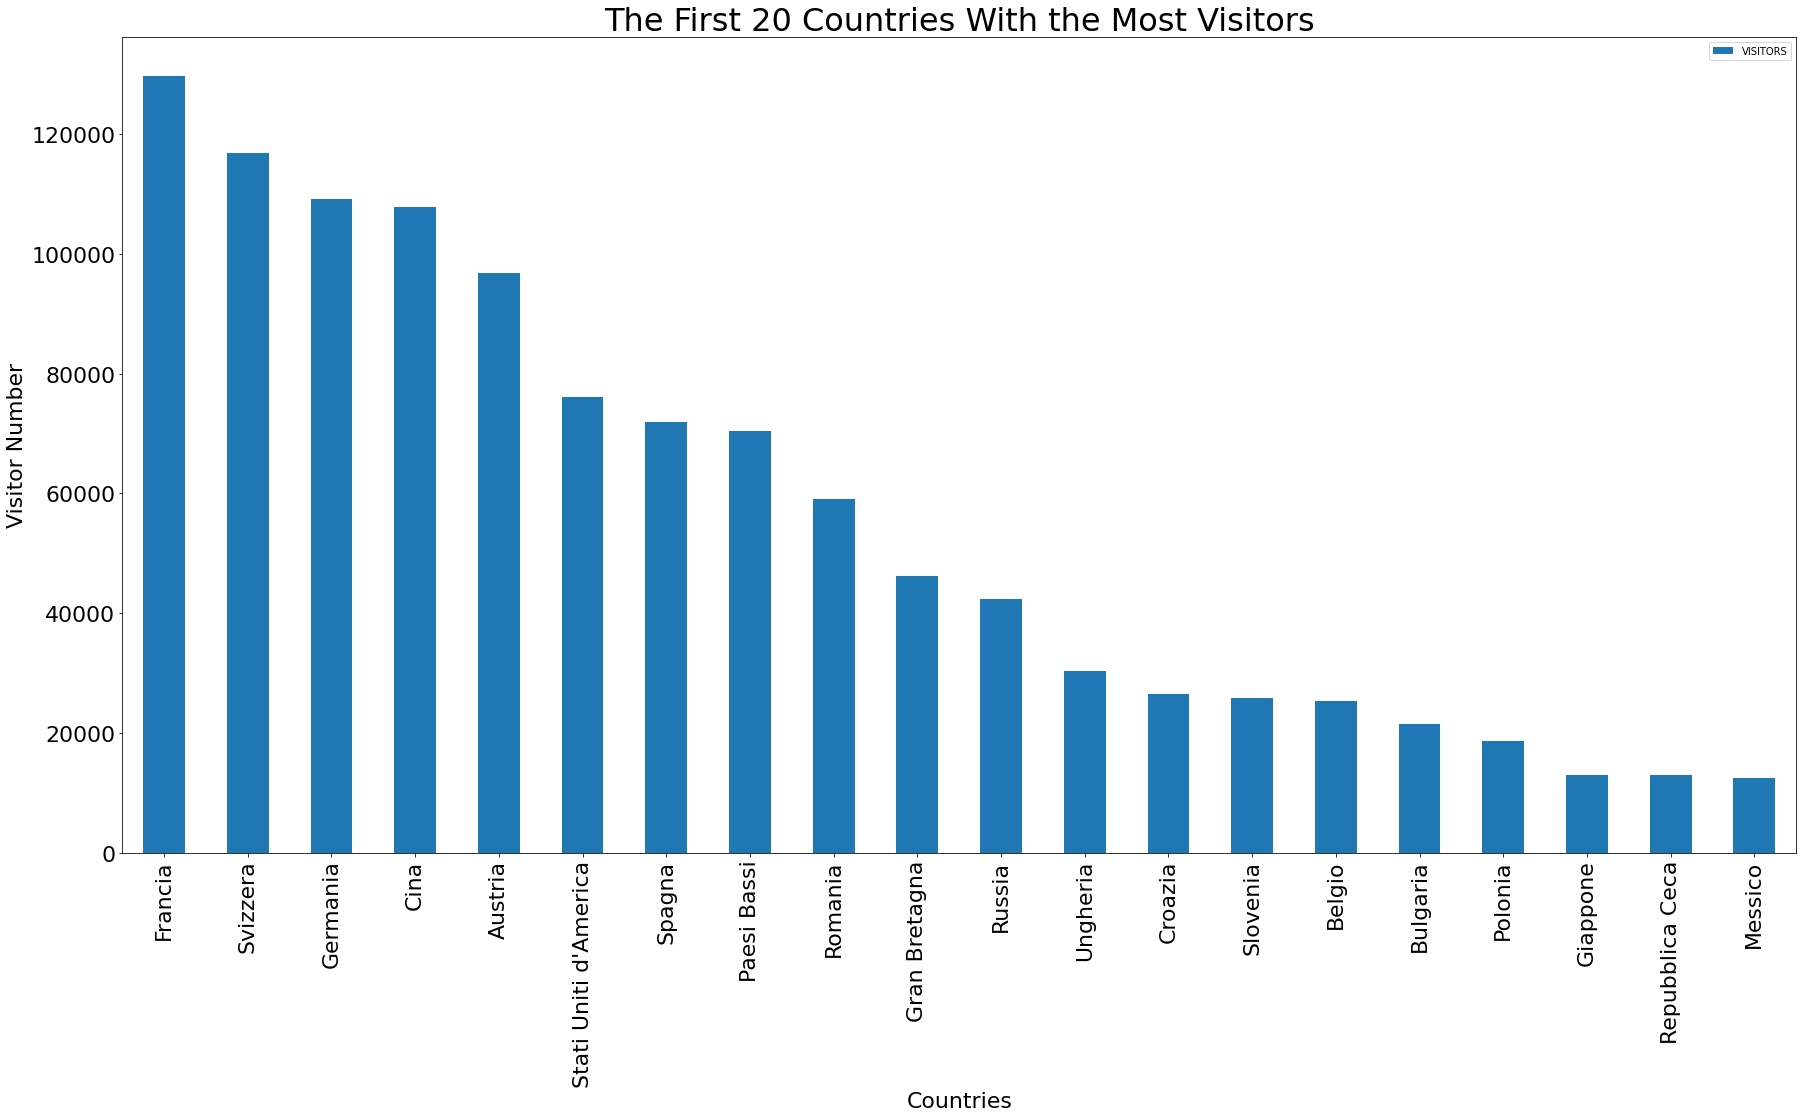

In [23]:
#1.1

# Filtering the foreigners
df_ranking = df_distinct_users[df_distinct_users['CUST_CLASS']=="foreigner"].merge(df_codici_nazioni)
# Ranking of foreign visitors
df_ranking_20 = df_ranking.groupby('COUNTRY_NAME_IT').sum('VISITORS').sort_values(by="VISITORS", ascending=False).head(20)
df_ranking_20 = df_ranking_20.reset_index()

ax = df_ranking_20.plot.bar(x='COUNTRY_NAME_IT', y='VISITORS',figsize=(30, 15))
ax.set_title('The First 20 Countries With the Most Visitors', fontdict={'size':32})
ax.set_ylabel(ylabel='Visitor Number', fontdict={'size':22})
ax.set_xlabel(xlabel='Countries', fontdict={'size':22})
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

df_ranking_20


,PROVINCIA,Inhabitants,COD_PRO,VISITORS,Weighted Value
58,Padova,933867,18004.0,1932696,1804881015432
51,Milano,3250077,8895.0,177380,576498658260
95,Venezia,851057,8154.0,620236,527856189452
77,Roma,4263542,11194.0,95056,405275248352
100,Vicenza,856939,16104.0,431952,370156514928
91,Treviso,884173,15860.0,317224,280480895752
98,Verona,922857,13018.0,181604,167594522628
88,Torino,2238663,222.0,39068,87460086084
54,Napoli,3048194,13797.0,24508,74705138552
13,Bologna,1017551,9361.0,72980,74260871980


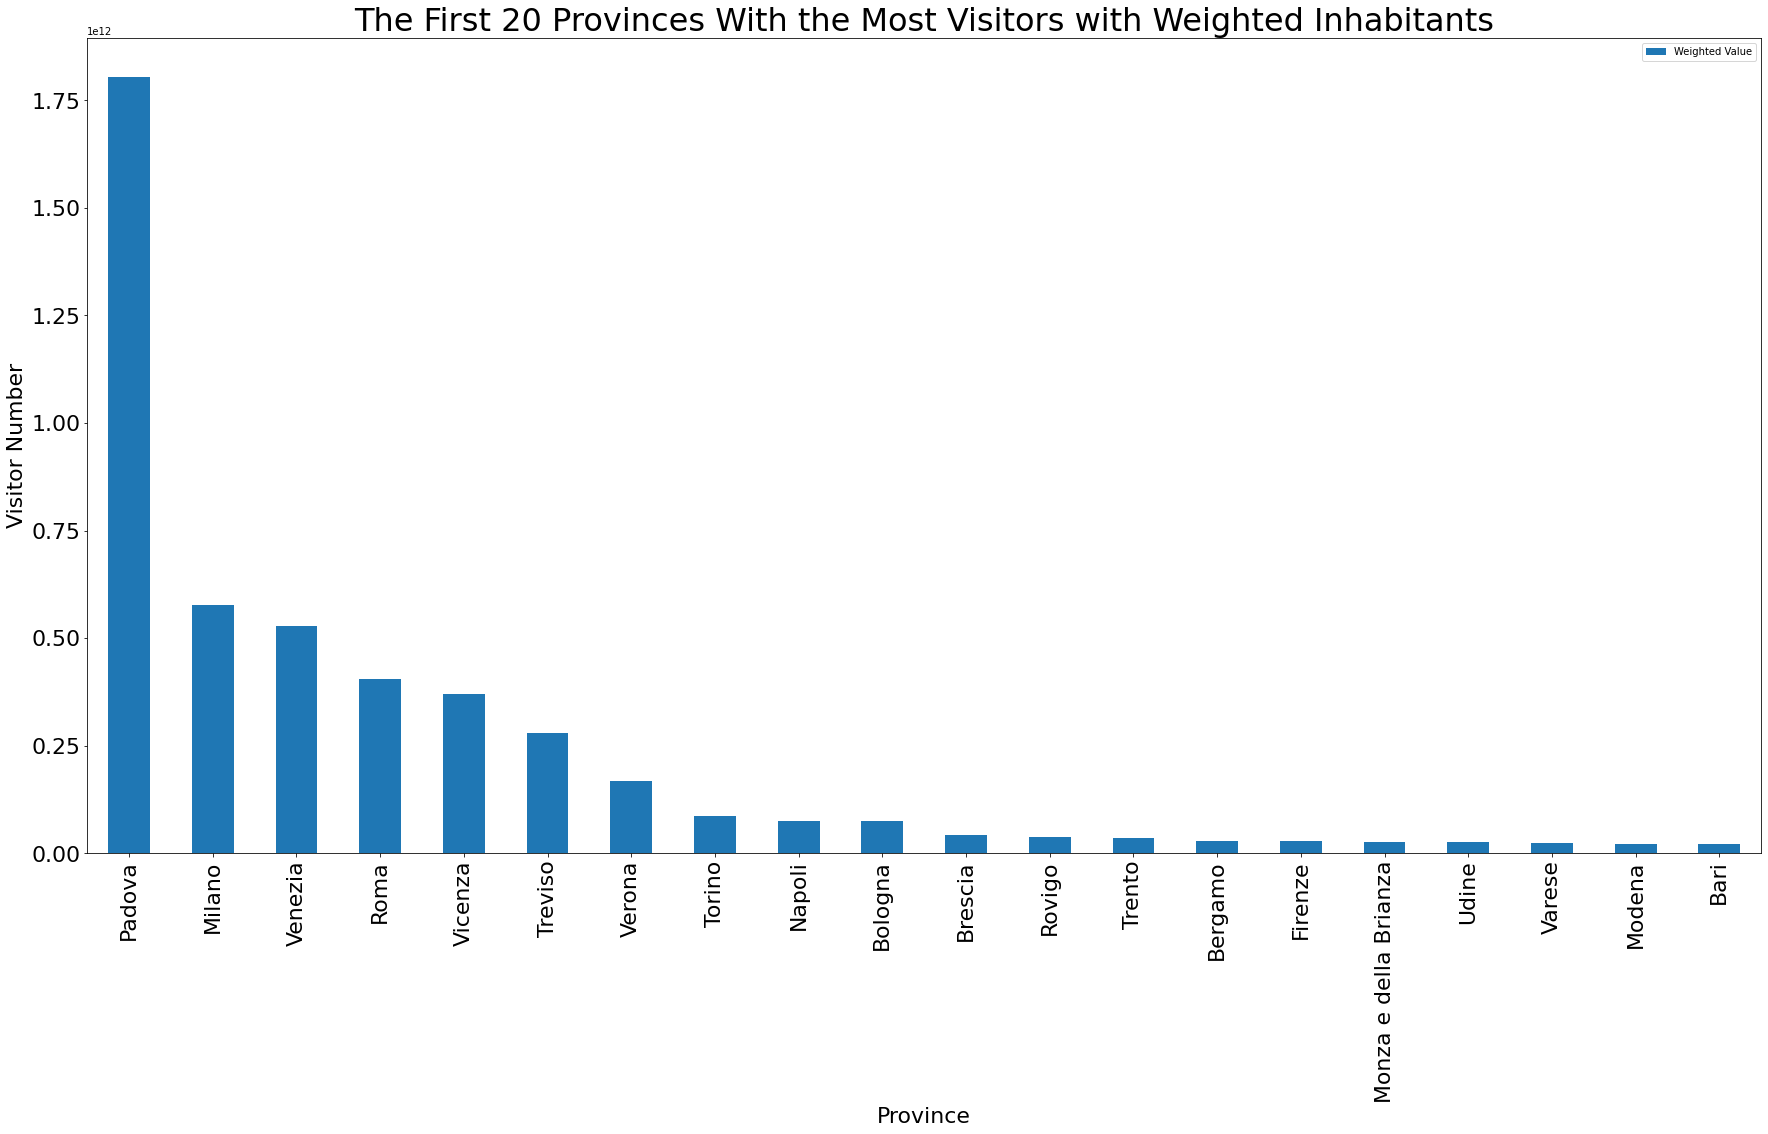

In [24]:
# 1.2
df_inhabitant = pd.read_csv('population_2019.csv',sep=',',encoding="latin-1")
df_inhabitant = df_inhabitant[['Territory', 'Value']]
df_inhabitant = df_inhabitant.rename(columns={"Value": "Inhabitants"})
# In order to find number of visitors per province --> df_ranking2
# Filter the Italian visitors
df_ranking2 = df_distinct_users[df_distinct_users['CUST_CLASS']=="visitor"].merge(df_codici_istat_provincia)
# Merged according to provinces
df_ranking2 = pd.merge(left=df_ranking2, right=df_inhabitant, left_on='PROVINCIA', right_on='Territory')
# dropped unnecessary columns
df_ranking2 = df_ranking2.drop(columns=['DOW','COD_COUNTRY','PRO_COM','COD_REG','PROV_SIGLA','Territory'])

# Grouped by Inhabitants and Provinces
df_ranking2 = df_ranking2.groupby(['PROVINCIA','Inhabitants']).sum().reset_index()
# Calculation of Weighted Values
df_ranking2['Weighted Value'] = df_ranking2.apply(lambda row: (row['VISITORS']*row['Inhabitants']), axis=1)
# Sorting by Weighted values
df_ranking_provinces_20 = df_ranking2.sort_values('Weighted Value',ascending=False).head(20)


bx = df_ranking_provinces_20.plot.bar(x='PROVINCIA', y='Weighted Value',figsize=(30, 15))
bx.set_title('The First 20 Provinces With the Most Visitors with Weighted Inhabitants', fontdict={'size':32})
bx.set_ylabel(ylabel='Visitor Number', fontdict={'size':22})
bx.set_xlabel(xlabel='Province', fontdict={'size':22})
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
df_ranking_provinces_20


In [25]:
# 2.1
from shapely.geometry import Point, Polygon
from shapely import wkt
import geopandas as gpd
import geojsonio

# -----------------
# We proved the nearest regions are the same with our choises from the map.
province_map = gpd.read_file("limits_IT_provinces.geojson") #read geojson file from github
province_map = province_map.to_crs(epsg=3395)#convert to crs epsg 3395 for europe area
province_map =province_map[["prov_name","geometry"]] #we only use prov name and geometry
province_map ["centroid"] = province_map.geometry.centroid #find the centroid of all provinces
padova_point = province_map.loc[province_map['prov_name'] == 'Padova'] #select padova geolocation
point = padova_point.iat[0,2] #point of padova
region_map = gpd.read_file("limits_IT_regions.geojson") #read geojson file from github
region_map = region_map.to_crs(epsg=3395)#convert to crs epsg 3395 for projection
region_map = region_map[["reg_name", "geometry"]] #we will only use region name and geometry columns
region_map ["centroid"] = region_map.geometry.centroid #find the centroid of each location
region_map =region_map.drop(4) #drop veneto as we want nearby regions
region_map = region_map.assign(dist_to_padova=region_map.distance(point)) #assign distance towards padova
region_map =region_map.sort_values(by = 'dist_to_padova', ascending = True) #sort by distance
region_map.drop(columns=['geometry','centroid'])
region_map.head(4)

,reg_name,geometry,centroid,dist_to_padova
7,Emilia-Romagna,"MULTIPOLYGON (((1038898.142 5549819.859, 10387...",POINT (1228808.573 5517285.760),58640.926392
2,Lombardia,"MULTIPOLYGON (((955080.923 5710030.603, 954600...",POINT (1087491.019 5689999.332),74407.520384
3,Trentino-Alto Adige/Südtirol,"POLYGON ((1337388.103 5838042.778, 1337365.200...",POINT (1256038.871 5820892.801),92590.827377
5,Friuli-Venezia Giulia,"MULTIPOLYGON (((1504695.802 5810993.097, 15047...",POINT (1452999.281 5774570.663),112586.487136


In [26]:
# 2.1 Continued
# Italy and only visitor type users have been filtered.
df_distinct_users1 = df_distinct_users[df_distinct_users['CUST_CLASS']=="visitor"]
df_distinct_users1 = df_distinct_users1[df_distinct_users1['COD_COUNTRY']==222]
#print(df_distinct_users)
# Data read for regions(To obtain the nearby region names) 
geo_data_regions = gpd.read_file('limits_IT_regions.geojson')
# Data cleaning according to province codes.
df_codici_istat_provincia = df_codici_istat_provincia[df_codici_istat_provincia['COD_PRO']>0]

# Combined mask for nearest regions of Padova
nearby_data_regions = geo_data_regions[(geo_data_regions['reg_name']=="Lombardia") | 
(geo_data_regions['reg_name']=="Friuli-Venezia Giulia") | 
(geo_data_regions['reg_name']=="Emilia-Romagna") |
(geo_data_regions['reg_name']=="Trentino-Alto Adige/Südtirol")                                      ] 

# to find out the provinces included in 3 different regions. 
nearby_data_province = pd.merge(nearby_data_regions,df_codici_istat_provincia,left_on=['reg_istat_code_num'],right_on=['COD_REG']).dropna()
#geo_data_RP
# to find out the visitor numbers of the regions
num_data_Users = nearby_data_province.merge(df_distinct_users1)
#geo_data_final

# Total number of visitors in the regions.
flux_data = num_data_Users.groupby(['reg_name','COD_REG']).sum().sort_values('VISITORS',ascending=False)
# Number of people 

flux_data

,,reg_istat_code_num,COD_PRO,COD_COUNTRY,PRO_COM,VISITORS
reg_name,COD_REG,,,,,
Lombardia,3,7878,73708,582972.0,73953176.0,360480
Emilia-Romagna,8,9016,44641,250194.0,44665405.0,233648
Friuli-Venezia Giulia,6,4026,32723,148962.0,32755096.0,111564
Trentino-Alto Adige/Südtirol,4,2936,15909,162948.0,15978359.0,93184


In [27]:
#2.1 Result:
# By looking at final table, we observe that the Lombardia region holds the most number of visitor.
#Therefore, highway A4 towards Milano-Torino,which passes through this region, should be prioritized.

In [28]:
#2.2 
# Before starting, we proved the minimum distance criteria are satisfied by our chosen nearby provinces.

import seaborn as sns
from shapely.geometry import Point, Polygon
import geopandas as gpd
import geojsonio

geo_data_pro = gpd.read_file('limits_IT_provinces.geojson')
# Dropped unnecessary columns.
geo_data_pro = geo_data_pro.drop(columns= ['prov_acr','reg_name','reg_istat_code','prov_istat_code','reg_istat_code_num'])
#geo_data_pro



df_distinct_users2 = df_distinct_users[df_distinct_users['COD_COUNTRY'] == 222] 

df_visitors = df_distinct_users2[df_distinct_users2['CUST_CLASS']=='visitor']

df_visitors = df_distinct_users.drop(columns=['DOW','PRO_COM','COD_COUNTRY'])

df_visitors = df_visitors.groupby(['COD_PRO']).sum()



#print(df_visitors)
# Used Mercator projection(crs=3395), which is good for the locations near to equator. 
geo_data_pro = geo_data_pro.to_crs(epsg=3395)
#Center point of Padova
Polygon_Padova = geo_data_pro[geo_data_pro['prov_istat_code_num']==28]['geometry']
#print(Polygon_Padova)
#from geometry object(Polygon), center point can be easily obtained.
# iloc is very important here because the object is GeoSeries, the first element of it gives point object!!!
Center_Padova = Polygon_Padova.centroid.iloc[0]

#print(Center_Padova.geom_type)
distance_list = []
for d in geo_data_pro['geometry']:
    #print(type(d))
    pro_center = d.centroid
    #print(type(pro_center))
    #print(Center_Padova)
    #print(pro_center.distance(Center_Padova.geometry))
    distance_list.append(pro_center.distance(Center_Padova))

geo_data_pro['Distances_to_Padova'] = distance_list
geo_data_pro = geo_data_pro.drop(columns=['geometry'])
#geo_data_pro

Visitors_Distance = pd.merge(geo_data_pro,df_visitors,left_on=['prov_istat_code_num'],right_on=['COD_PRO']).dropna()
Visitors_Distance = Visitors_Distance.sort_values('Distances_to_Padova',ascending=True)
Visitors_Distance.head(5)

# This is the proof of how we choise the Provinces by the help of distance function of Geopandas.

,prov_name,prov_istat_code_num,Distances_to_Padova,VISITORS
28,Padova,28,0.000000,3125884
29,Rovigo,29,55002.234937,163464
24,Vicenza,24,62371.874590,431952
27,Venezia,27,76560.123224,620236
26,Treviso,26,83987.119043,317224


In [29]:
# 2.2 Continued
#------------
# Filtering the data due to unknown or missing rows. i.e PRO_COM = -999.0
df_day_od = df_day_od_orj.copy()
df_day_od = df_day_od[df_day_od['PRO_COM']>0]
df_day_od = df_day_od[df_day_od['COD_PRO']>0]
# Filtering only visitors from Italy
df_day_od = df_day_od[df_day_od['COD_COUNTRY']==222]
# Visitors, resident workers or Altro(maybe the workers from outside to Padova) 
# must be considered for more detailed study.
df_day_od = df_day_od[df_day_od['CUST_CLASS']!='foreigner']
# Some of the unused columns are dropped for better visualization
df_day_od = df_day_od.drop(columns=['ORIGIN','DESTINATION','PRO_COM','MONTH'])

# We merged 2 data frame 
df_day_od = df_day_od.merge(df_codici_istat_provincia)
# Only nearby provinces are considered in each direction.
df_day_od = df_day_od[(df_day_od['PROVINCIA']=='Vicenza') | (df_day_od['PROVINCIA']=='Venezia') | (df_day_od['PROVINCIA']=='Treviso') | (df_day_od['PROVINCIA']=='Rovigo')]
# Drop unnecessary columns
df_day_od = df_day_od.drop(columns=['COD_REG','COD_COUNTRY','PROV_SIGLA'])
# Group according to Provinces, cust_class and the day of the week.
direction_vector = []
for i in df_day_od['PROVINCIA']:
    if i == 'Rovigo':
        direction_vector.append('S')
    elif i == 'Vicenza':
        direction_vector.append('W')
    else:
        direction_vector.append('E')

df_day_od['Directions'] = direction_vector
        
week_vector = []
for j in df_day_od['DOW']:
    if j == 'Sabato' or j=='Domenica':
        week_vector.append('WE')
    else:
        week_vector.append('WD')
        
        
df_day_od['DayOfWeek'] = week_vector    

df_day_od = df_day_od.drop(columns=['DOW','PROVINCIA','COD_PRO'])

df_directions = df_day_od.groupby(['CUST_CLASS','Directions','DayOfWeek']).sum()

df_directions

FLOW
CUST_CLASS Directions DayOfWeek        
visitor    E          WD         608627
                      WE         120261
           S          WD          58065
                      WE          13270
           W          WD         147947
                      WE          27360

In [30]:
#2.2 Result:
# For this decision, let's first analyze weekend visitors and working daily commuters seperately.
# Working daily commuters: 
# Among WD, West highway (A4 towards Milano-Torino) has the largest number of visitor. Therefore, we can say that 
# highway A4 towards Milano-Torino should be prioritized by this metric.

# Weekend visitors:
# By looking at the table, we observe that again, West highway (A4 towards Milano-Torino) has the largest number of visitor. 
#Therefore, we can say that highway A4 towards Milano-Torino should be prioritized by this metric.

#Since both the data agree on the same highway, as a result,
# Highway A4 towards Milano-Torino (from West) should be prioritized

In [31]:
# 3
import seaborn as sns
from shapely.geometry import Point, Polygon
import geopandas as gpd
import geojsonio


geo_data_pro = gpd.read_file('limits_IT_provinces.geojson')
# Dropped unnecessary columns.
geo_data_pro = geo_data_pro.drop(columns= ['prov_acr','reg_name','reg_istat_code','prov_istat_code','reg_istat_code_num'])
#geo_data_pro



df_distinct_users2 = df_distinct_users[df_distinct_users['COD_COUNTRY'] == 222] 

df_visitors = df_distinct_users2[df_distinct_users2['CUST_CLASS']=='visitor']

df_visitors = df_distinct_users.drop(columns=['DOW','PRO_COM','COD_COUNTRY'])

df_visitors = df_visitors.groupby(['COD_PRO']).sum()



#print(df_visitors)
# Used Mercator projection(crs=3395), which is good for the locations near to equator. 
geo_data_pro = geo_data_pro.to_crs(epsg=3395)
#Center point of Padova
Polygon_Padova = geo_data_pro[geo_data_pro['prov_istat_code_num']==28]['geometry']
#print(Polygon_Padova)
#from geometry object(Polygon), center point can be easily obtained.
# iloc is very important here because the object is GeoSeries, the first element of it gives point object!!!
Center_Padova = Polygon_Padova.centroid.iloc[0]

#print(Center_Padova.geom_type)
distance_list = []
for d in geo_data_pro['geometry']:
    #print(type(d))
    pro_center = d.centroid
    #print(type(pro_center))
    #print(Center_Padova)
    #print(pro_center.distance(Center_Padova.geometry))
    distance_list.append(pro_center.distance(Center_Padova))

geo_data_pro['Distances_to_Padova'] = distance_list
geo_data_pro = geo_data_pro.drop(columns=['geometry'])
#geo_data_pro

Visitors_Distance = pd.merge(geo_data_pro,df_visitors,left_on=['prov_istat_code_num'],right_on=['COD_PRO']).dropna()
Visitors_Distance



,prov_name,prov_istat_code_num,Distances_to_Padova,VISITORS
0,Torino,1,4.873764e+05,39068
1,Vercelli,2,4.016314e+05,1940
2,Novara,3,3.638422e+05,9164
3,Cuneo,4,4.892190e+05,3372
4,Asti,5,4.099965e+05,1440
...,...,...,...,...
100,Siracusa,89,1.273902e+06,1552
101,Sassari,90,7.673450e+05,2832
102,Nuoro,91,8.271407e+05,136
103,Cagliari,92,9.697096e+05,4796


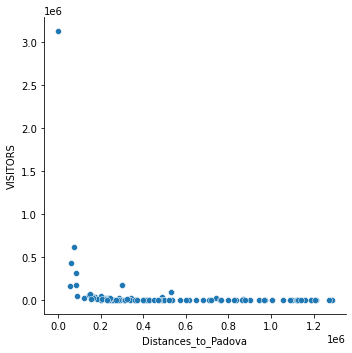

In [32]:
# 3 - Scatter plot using seaborn.
sns.relplot(x="Distances_to_Padova", y="VISITORS", data=Visitors_Distance)
#sns.histplot(data=Visitors_Distance,x="Distances_to_Padova",y="VISITORS")
#sns.displot(data=Visitors_Distance,x="Distances_to_Padova",y="VISITORS",kind='hist',aspect=1.5)

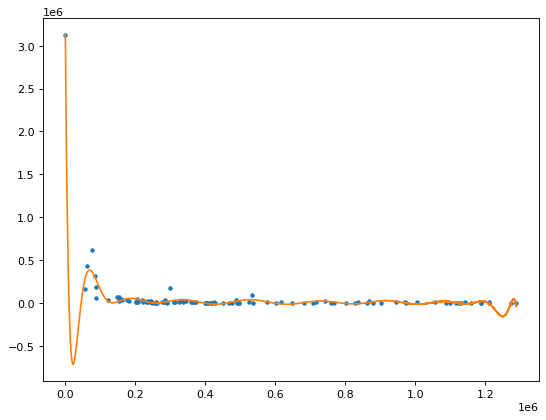

In [33]:
# 3.1 polynomial regression
import warnings
fig = plt.figure(figsize=(8, 6), dpi=80)
X = Visitors_Distance['Distances_to_Padova'].values
y = Visitors_Distance['VISITORS'].values

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    fittedValues = np.poly1d(np.polyfit(X, y, 20))
xp = np.linspace(0, 1288000, 13000000)
_ = plt.plot(X, y, '.', xp, fittedValues(xp), '-')

In [34]:
X = Visitors_Distance['Distances_to_Padova'].values.reshape(-1, 1)
y = Visitors_Distance['VISITORS'].values
list1 = []

for i in range(len(X)):
    list1.append(np.polyval(fittedValues, X[i]))
est = [np.round(x) for x in list1]
Visitors_Distance['Estimation'] = est


Visitors_Distance['Discrapency'] = Visitors_Distance['VISITORS'] - Visitors_Distance['Estimation']

Visitors_Distance['Discrapency'] = Visitors_Distance['Discrapency'].apply(lambda x: np.sqrt(np.mean(np.square(x))))


Visitors_Distance = Visitors_Distance.sort_values('Discrapency',ascending = False)
Visitors_Distance.head(5)

,prov_name,prov_istat_code_num,Distances_to_Padova,VISITORS,Estimation,Discrapency
27,Venezia,27,76560.123224,620236,[360833.0],259403.0
43,Ferrara,38,88287.866522,53832,[266661.0],212829.0
12,Milano,15,299414.901699,177380,[21457.0],155923.0
23,Verona,23,86605.760533,181604,[282489.0],100885.0
29,Rovigo,29,55002.234937,163464,[259456.0],95992.0
